<a href="https://colab.research.google.com/github/shihanxie/Econ475/blob/main/RegressionModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm

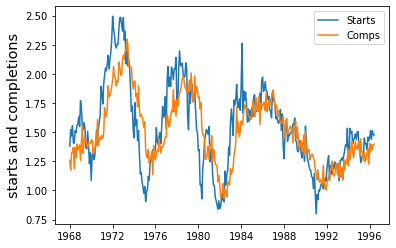

In [ ]:
housing = pd.read_csv('https://raw.githubusercontent.com/shihanxie/Econ475/main/data/DataHousing.csv')
housing.index = pd.to_datetime(housing['OBS'], format="%Y-%m-%d")

plt.plot(housing['STARTS'], label = 'Starts')
plt.plot(housing['COMPS'], label = 'Comps')
plt.ylabel('starts and completions', fontsize = 'x-large')
plt.legend()
plt.show()

###Correlogram of housing starts

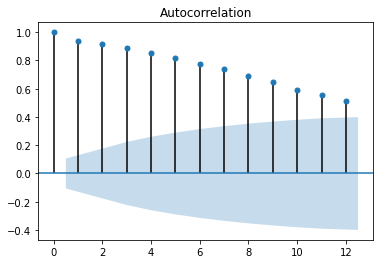

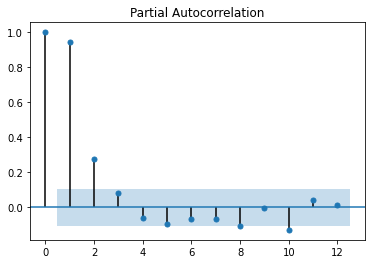

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(housing['STARTS'], lags=12)
plot_pacf(housing['STARTS'], lags=12)
plt.show()

###Correlogram of housing completions

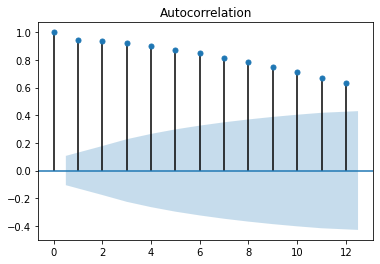

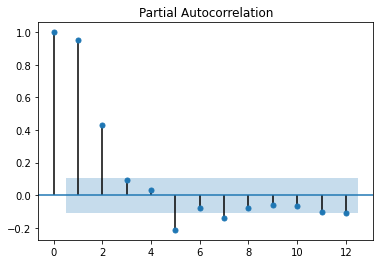

In [ ]:
plot_acf(housing['COMPS'], lags=12)
plot_pacf(housing['COMPS'], lags=12)
plt.show()

###Cross-correlations of housing starts and completions

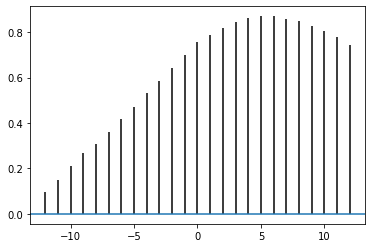

In [ ]:
import matplotlib.mlab as mlab
plt.xcorr(housing['COMPS'][:-60], housing['STARTS'][:-60], detrend = mlab.detrend_mean , maxlags=12)
plt.show()

##VAR model with 4 lags

In [ ]:
from statsmodels.tsa.api import VAR
Y = housing[['COMPS','STARTS']]['1968-01-01':'1991-12-01']
model = VAR(Y)
results_VAR4 = model.fit(4)
print(results_VAR4.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 17, Mar, 2021
Time:                     03:04:10
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -9.12560
Nobs:                     284.000    HQIC:                  -9.26415
Log likelihood:           540.718    FPE:                8.63738e-05
AIC:                     -9.35687    Det(Omega_mle):     8.11490e-05
--------------------------------------------------------------------
Results for equation COMPS
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.045347         0.025794            1.758           0.079
L1.COMPS          0.236774         0.059893            3.953           0.000
L1.STARTS         0.074724         0.035711            2.092           0.036

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


###Residual plot for housing starts

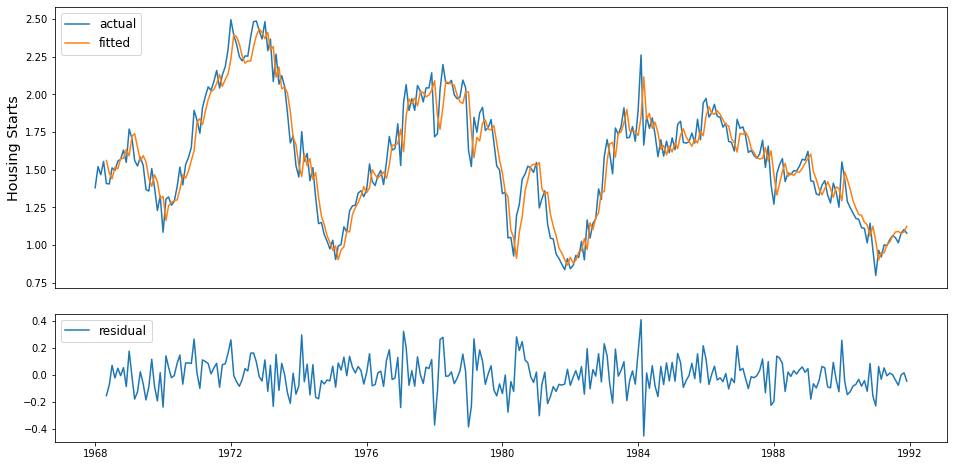

In [ ]:
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
ax2 = fig.add_subplot(gs[2], sharex=ax1)

ax1.plot(Y['STARTS'], label = 'actual')
ax1.plot(results_VAR4.fittedvalues['STARTS'], label = 'fitted')

ax2.plot(results_VAR4.resid['STARTS'], '-',label='residual')

ax1.tick_params(bottom=False, labelbottom=False, left=True, labelleft=True)
ax1.set_ylabel('Housing Starts', fontsize = 'x-large')

ax1.legend(loc='upper left', fontsize = 'large')
ax2.legend(loc='upper left', fontsize = 'large')
plt.show()

###Correlogram of housing starts residuals

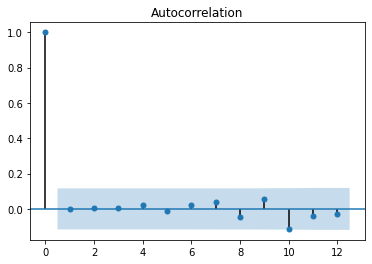

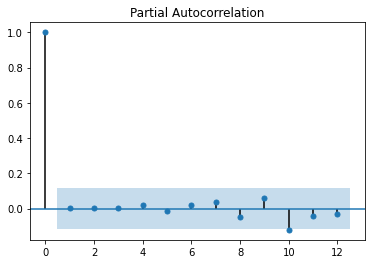

In [ ]:
plot_acf(results_VAR4.resid['STARTS'], lags=12)
plot_pacf(results_VAR4.resid['STARTS'], lags=12)
plt.show()

###Residual plot of housing completions

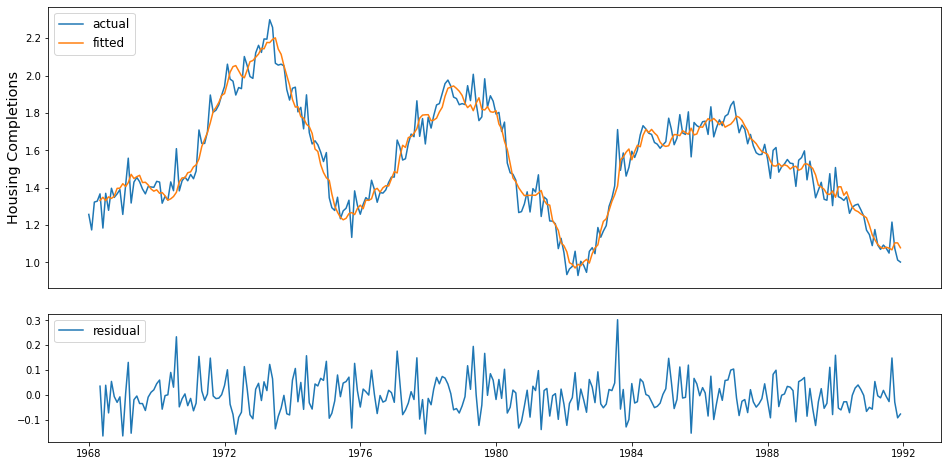

In [ ]:
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
ax2 = fig.add_subplot(gs[2], sharex=ax1)

ax1.plot(Y['COMPS'], label = 'actual')
ax1.plot(results_VAR4.fittedvalues['COMPS'], label = 'fitted')

ax2.plot(results_VAR4.resid['COMPS'], '-',label='residual')

ax1.tick_params(bottom=False, labelbottom=False, left=True, labelleft=True)
ax1.set_ylabel('Housing Completions', fontsize = 'x-large')

ax1.legend(loc='upper left', fontsize = 'large')
ax2.legend(loc='upper left', fontsize = 'large')
plt.show()

###Correlogram of housing completions residuals

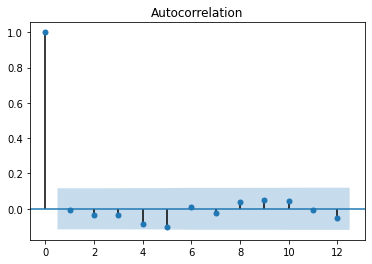

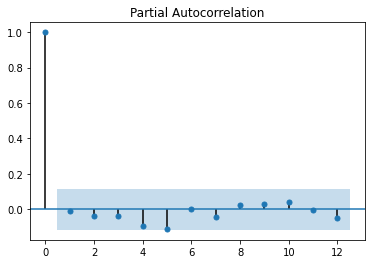

In [ ]:
plot_acf(results_VAR4.resid['COMPS'], lags=12)
plot_pacf(results_VAR4.resid['COMPS'], lags=12)
plt.show()

###Granger Causality Test

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Null hypothesis: Starts does not cause completions
data = housing[['COMPS','STARTS']]['1968-01-01':'1991-12-01']
gc_res = grangercausalitytests(data, maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=45.0257 , p=0.0000  , df_denom=284, df_num=1
ssr based chi2 test:   chi2=45.5014 , p=0.0000  , df=1
likelihood ratio test: chi2=42.2354 , p=0.0000  , df=1
parameter F test:         F=45.0257 , p=0.0000  , df_denom=284, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=33.9639 , p=0.0000  , df_denom=281, df_num=2
ssr based chi2 test:   chi2=69.1365 , p=0.0000  , df=2
likelihood ratio test: chi2=61.9219 , p=0.0000  , df=2
parameter F test:         F=33.9639 , p=0.0000  , df_denom=281, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=29.3907 , p=0.0000  , df_denom=278, df_num=3
ssr based chi2 test:   chi2=90.3923 , p=0.0000  , df=3
likelihood ratio test: chi2=78.5125 , p=0.0000  , df=3
parameter F test:         F=29.3907 , p=0.0000  , df_denom=278, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=26.2658 , p=0.0000  

In [ ]:
# Null hypothesis: Completions does not cause starts
data = housing[['STARTS','COMPS']]['1968-01-01':'1991-12-01']
gc_res = grangercausalitytests(data, maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0606  , p=0.8058  , df_denom=284, df_num=1
ssr based chi2 test:   chi2=0.0612  , p=0.8046  , df=1
likelihood ratio test: chi2=0.0612  , p=0.8046  , df=1
parameter F test:         F=0.0606  , p=0.8058  , df_denom=284, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.3789  , p=0.0355  , df_denom=281, df_num=2
ssr based chi2 test:   chi2=6.8780  , p=0.0321  , df=2
likelihood ratio test: chi2=6.7966  , p=0.0334  , df=2
parameter F test:         F=3.3789  , p=0.0355  , df_denom=281, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.5772  , p=0.0144  , df_denom=278, df_num=3
ssr based chi2 test:   chi2=11.0020 , p=0.0117  , df=3
likelihood ratio test: chi2=10.7949 , p=0.0129  , df=3
parameter F test:         F=3.5772  , p=0.0144  , df_denom=278, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.2388  , p=0.0651  

###Forecast with VAR model

In [ ]:
data = pd.DataFrame.to_numpy(Y)
mean_forecast = results_VAR4.forecast(data, steps = 54)
housing[['COMPS forecast','STARTS forecast']] = np.nan
housing['COMPS forecast']['1992-01-01':'1996-06-01'] = mean_forecast[:,0]
housing['STARTS forecast']['1992-01-01':'1996-06-01'] = mean_forecast[:,1]

ci_forecast = results_VAR4.forecast_interval(data, steps = 54)
housing[['COMPS upper', 'COMPS lower', 'STARTS upper', 'STARTS lower']] = np.nan
housing['COMPS lower']['1992-01-01':'1996-06-01'] = ci_forecast[1][:,0]
housing['STARTS lower']['1992-01-01':'1996-06-01'] = ci_forecast[1][:,1]
housing['COMPS upper']['1992-01-01':'1996-06-01'] = ci_forecast[2][:,0]
housing['STARTS upper']['1992-01-01':'1996-06-01'] = ci_forecast[2][:,1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/i

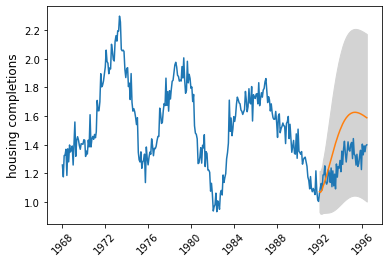

In [ ]:
plt.plot(housing['COMPS'])
plt.plot(housing['COMPS forecast'])
plt.fill_between(housing.index, housing['COMPS lower'], housing['COMPS upper'], color='lightgrey')

ax = plt.gca()
ax.tick_params(axis = 'x', rotation = 45)
ax.set_ylabel('housing completions', fontsize = 'large')

plt.show()

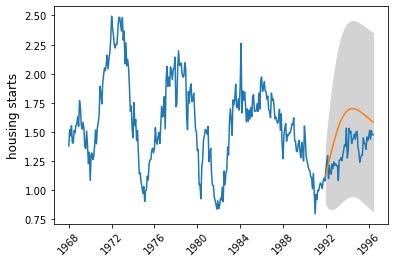

In [ ]:
plt.plot(housing['STARTS'])
plt.plot(housing['STARTS forecast'])
plt.fill_between(housing.index, housing['STARTS lower'], housing['STARTS upper'], color='lightgrey')

ax = plt.gca()
ax.tick_params(axis = 'x', rotation = 45)
ax.set_ylabel('housing starts', fontsize = 'large')

plt.show()